In [1]:
import sqlite3
import csv
import string
import re

My final project originates from the Sociolinguistics final project from the 1st year of MA program (completed in cooperation with Anastasia Zhuk) and is dedicated to the problems which are faced by migrants to Russia when studying Russian language. For these project, a series of online interviews via VK and other social networks was carried out. Informants were asked to name features of Russian language which were the most problematic for them.
Correlation with the place of learning (Russia/abroad) and other factors mentioned below is examined.

In [2]:
with open('migrants_table.tsv', 'r', encoding='utf-8') as tf:
  tlines = tf.readlines()
  metadata = tlines[0]
  heads_migr = metadata.split("\t")
  for tline in tlines[1:]:
    tcells = tline.split("\t")

My table has 20 columns:

1. ID
2. Gender
3. Native language
4. Kinship to Russian - does the native language have kinship to Russian at any level (Indo-European family, Slavonic branch etc.)
5. Nationality
6. Linguistic competence level:
  strong - if informant knows at least 2 foreign languages besides Russian
  medium - if (s)he knows 1 foreign language besides Russian
  weak - if (s)he has no knowledge of foreign languages besides Russian
7. Place of learning - Russia or abroad
8. Way of learning - academic (at school or university), informal (ONLY from personal communication), etc.
Reasons for migration - academic or non-academic (employees, refugees)
9. Reasons for migration - academic or non-academic
10.-21. Problems

In [3]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('nc_eslav.db')
c = conn.cursor()
with open('migrants_table.tsv', 'r', encoding='utf-8') as tfr:
  tfr = tfr.readlines()
  data = tfr[1:]
c.execute("DROP TABLE IF EXISTS migrants")
c.execute("CREATE TABLE IF NOT EXISTS migrants(ID text, gender text, language text, kinship text, country text, lcl text, place text, way text, reason text,\
stress text, nomcase text, numcase text, conjugation text, aspect text, motion text, nomgender text, phonetics text, lexic text, syntax text, stylistics text, script text)")
for row in data:
  row = row.split('\t')
  c.execute("INSERT INTO migrants VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row [7], row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], row[16], row [17], row[18], row[19], row[20].strip("\n")))
df = pd.read_sql_query("SELECT * from migrants", conn)
conn.commit()
conn.close()

The database and dataframe has been created, and now it's time to manipulate it.

In [4]:
import numpy as np
import re
df["lcl"].mask(df["lcl"].str.contains(","), "strong", inplace = True)
df

,ID,gender,language,kinship,country,lcl,place,way,reason,stress,...,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
0,af1,f,Dari,Indo-European,Afghanistan,English,Russia,academic,academic,yes,...,yes,no,no,no,no,no,no,no,no,no
1,sy1,m,Levantine Arabic,none,Syria,,Russia,informal,non-academic,no,...,yes,no,no,no,no,no,yes,no,no,no
2,it1,f,Italian,Indo-European,Italy,English,abroad,academic,academic,no,...,yes,no,yes,no,no,no,yes,no,no,no
3,sk1,m,Slovak,Slavonic,Slovakia,strong,abroad,academic,academic,yes,...,no,no,no,no,no,no,no,no,no,no
4,bg1,m,Bulgarian,Slavonic,Bulgaria,English,abroad,academic,academic,no,...,yes,yes,no,no,no,no,no,no,no,no
5,tj1,m,Tajik,Indo-European,Uzbekistan,strong,abroad,academic,non-academic,no,...,yes,no,no,no,yes,no,no,yes,no,no
6,cn1,m,Mandarin Chinese,none,China,English,abroad,academic,academic,no,...,no,no,no,no,no,no,yes,no,no,no
7,cv1,f,Cape Verdean Creole,Indo-European,Copa Verde,strong,Russia,academic,academic,no,...,yes,yes,no,no,no,no,no,no,no,no
8,cm1,m,Bulu (Cameroon),none,Cameroon,strong,Russia,academic,academic,no,...,yes,no,no,no,no,yes,no,no,yes,no
9,us1,f,English,Indo-European,USA,,abroad,academic,academic,no,...,yes,no,no,no,no,no,no,no,no,yes


In [5]:
df["lcl"].mask(df["lcl"] == "English", "medium", inplace = True)
df["lcl"].mask(df["lcl"] == "", "weak", inplace = True)
problems = ["stress", "nomcase", "numcase", "conjugation", "aspect", "motion", "nomgender", "phonetics", "lexic", "syntax", "stylistics", "script"]
for problem in problems:
  df[problem].mask(df[problem] == "yes", 1, inplace = True)
  df[problem].mask(df[problem] == "no", 0, inplace = True)
df

,ID,gender,language,kinship,country,lcl,place,way,reason,stress,...,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
0,af1,f,Dari,Indo-European,Afghanistan,medium,Russia,academic,academic,1,...,1,0,0,0,0,0,0,0,0,0
1,sy1,m,Levantine Arabic,none,Syria,weak,Russia,informal,non-academic,0,...,1,0,0,0,0,0,1,0,0,0
2,it1,f,Italian,Indo-European,Italy,medium,abroad,academic,academic,0,...,1,0,1,0,0,0,1,0,0,0
3,sk1,m,Slovak,Slavonic,Slovakia,strong,abroad,academic,academic,1,...,0,0,0,0,0,0,0,0,0,0
4,bg1,m,Bulgarian,Slavonic,Bulgaria,medium,abroad,academic,academic,0,...,1,1,0,0,0,0,0,0,0,0
5,tj1,m,Tajik,Indo-European,Uzbekistan,strong,abroad,academic,non-academic,0,...,1,0,0,0,1,0,0,1,0,0
6,cn1,m,Mandarin Chinese,none,China,medium,abroad,academic,academic,0,...,0,0,0,0,0,0,1,0,0,0
7,cv1,f,Cape Verdean Creole,Indo-European,Copa Verde,strong,Russia,academic,academic,0,...,1,1,0,0,0,0,0,0,0,0
8,cm1,m,Bulu (Cameroon),none,Cameroon,strong,Russia,academic,academic,0,...,1,0,0,0,0,1,0,0,1,0
9,us1,f,English,Indo-European,USA,weak,abroad,academic,academic,0,...,1,0,0,0,0,0,0,0,0,1


We standardized the data in the column "Language competence level". In fact, the masking involved a bit of cheating, since we see that in every case an informant knows 1 foreign language besides Russian, this language is English.
Besides it, "yes" and "no" have been substituted by 1 and 0, respectively, in order to facilitate the grouping.

In [6]:
df_categorial = df.groupby("lcl").agg({problem: "mean" for problem in problems})
df_categorial

,stress,nomcase,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
lcl,,,,,,,,,,,,
medium,0.181818,0.545455,0.636364,0.181818,0.181818,0.363636,0.090909,0.090909,0.181818,0.00,0.0,0.00
strong,0.100000,0.400000,0.400000,0.200000,0.000000,0.100000,0.200000,0.100000,0.100000,0.10,0.1,0.00
weak,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.25,0.0,0.25


Thus, problems with Cyrillic script are faced exclusively by people with weak level of competence, while people with strong level do not face problems with phrase construction. Phonetical and lexical problems are also more frequent for people with no experience of foreign languages.

However, problems with verbal aspect and motion verbs are more frequent for people with rich experience (it is probable that others do not realize having these problems). Unexpectedly, people with strong level have more problems with nominal gender - probable because gender distribution of Russian differs from those of other languages utilizing gender systems.

In [7]:
df_kin = df.groupby("kinship").agg({problem: "mean" for problem in problems})
df_kin

,stress,nomcase,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
kinship,,,,,,,,,,,,
Indo-European,0.111111,0.666667,0.777778,0.333333,0.111111,0.111111,0.222222,0.00,0.111111,0.111111,0.000000,0.111111
Slavonic,0.500000,0.250000,0.250000,0.250000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
none,0.000000,0.416667,0.416667,0.000000,0.083333,0.166667,0.083333,0.25,0.333333,0.083333,0.083333,0.000000


As we see, problems with lexicon and nominal gender are not faced by Slavonic languages native speakers. Moreover, problems with cases are less typical for them.Problems with phonetics are only faced by speakers of non-IE languages.

It is interesting that speakers of IE languages face more problems with conjugation - probably because of interference effect. Besides that, non-Slavonic IE speakers face more problems with declension. Also, Slavonic students face problems with motion verbs probably because this semantic field in Russian is different from other languages. The same must be true for stress.

In [8]:
df_place = df.groupby("place").agg({problem: "mean" for problem in problems})
df_place

,stress,nomcase,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
place,,,,,,,,,,,,
Russia,0.083333,0.583333,0.583333,0.250000,0.000000,0.166667,0.000000,0.166667,0.166667,0.083333,0.083333,0.000000
abroad,0.153846,0.384615,0.461538,0.076923,0.153846,0.230769,0.230769,0.076923,0.230769,0.076923,0.000000,0.076923


People who studied Russian in Russia are more likely to report problems with conjugation and nominal case, but less likely to report problems with aspects and nominal genders.

In [9]:
df_way = df.groupby("way").agg({problem: "mean" for problem in problems})
df_way

,stress,nomcase,numcase,conjugation,aspect,motion,nomgender,phonetics,lexic,syntax,stylistics,script
way,,,,,,,,,,,,
academic,0.130435,0.434783,0.478261,0.130435,0.086957,0.217391,0.130435,0.130435,0.173913,0.086957,0.043478,0.043478
informal,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


People who received no formal training, face much more problems with declension and conjugation, and - unexpectedly - with lexicon.

People who learned Russian merely from communication, do not face (or, perhaphs more precisely, did not report) problems with motion verbs. Gender also appears to be less problematic for them.

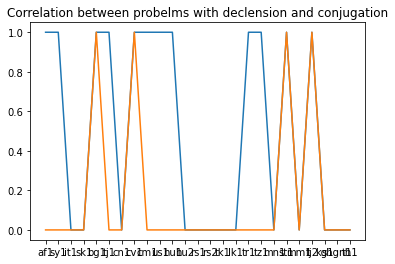

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Correlation between probelms with declension and conjugation')
plt.plot(df["ID"], df["nomcase"])
plt.plot(df["ID"], df["conjugation"])

As we see, all informants who face problems with verb conjugation, do also struggle with noun declension, but not vice versa - many people who mastered conjugation easily, had some difficulties with declension.

Text(0.5, 1.0, 'Overall attitude towards numeral declension')

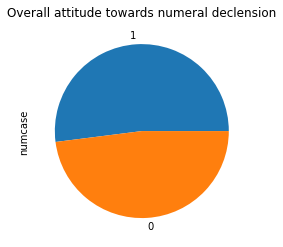

In [11]:
df['numcase'].value_counts().plot(kind='pie')
plt.title("Overall attitude towards numeral declension")

Text(0.5, 1.0, 'Male attitude towards numeral declension')

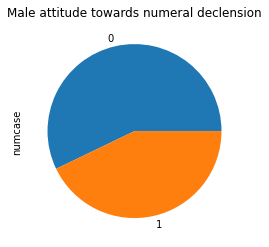

In [12]:
maledf = df[df["gender"] == "m"]
maledf['numcase'].value_counts().plot(kind='pie')
plt.title("Male attitude towards numeral declension")

Text(0.5, 1.0, 'Female attitude towards numeral declension')

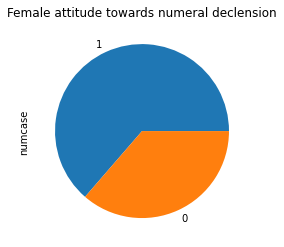

In [13]:
femaledf = df[df["gender"] == "f"]
femaledf['numcase'].value_counts().plot(kind='pie')
plt.title("Female attitude towards numeral declension")

We have examined the distribution of numeral case problem, which is the most frequent, in correlation with the gender. It can be seen that within the sample, women experience (or report) this problem more often.

In [14]:
pip install lingtypology

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import lingtypology

In [17]:
languages = df["language"]
features = df["numcase"]
map = lingtypology.LingMap(languages)
map.add_features(features)
map.create_map()

We have examined the geographical distribution of native languages of people who have problems with numeral case (which is the most frequent) and of those who don't.

As we see, native speakers of European and African languages face such problems - except for Italian informant. An exception cannot be explained by linguistic properties of Italian, but it might be caused by the fact that an informant has a degree in linguistics.

Native speakers of Asian languages do not face such problems - except for Afghan and Tajik informants. An exception could be explained by the lack of case systems in Indo-Iranian languages, but Chinese and Thai also lack case systems. More probable reason is that both of Tajik informants had no university training, either in Tajikistan or in Russia. The Afghan case remains unexplained.

Overall, linguistic problems of migrants to Russia and their correlation with different sociolinguistic factors were examined. The conclusions are as follows:

1) Case system is the most difficult element of Russian grammar for non-native speakers, more than 50% of informants face problems with it.

1.1) All informants who face problems with nominal case, also face problems with numeral case, but the latter is a bit more difficult - an Italian informant which overcame a nominal case learning easily, had problems with numeral declension.

2) Previous experience of learning foreign languages is valuable: people people which did not study foreign languages except Russian (at least up to an intermediate level) prior to migration, might have had problems with phonetics, lexicon and script, which are unfamiliar to people with non-weak LCL. However, people who succeeded in learning several foreign languages, experienced more problems with acquisition of nominal gender.

3) Problems of Slavonic, non-Slavonic IE and non-IE languages native speakers are also different.

4) Gender might also have an influence on the results. Only one problem was examined in terms of gender influence, but the examination has shown that female informants had more problems with declension.

Having said all of that, it should be kept in mind, that it is only true within a sample, which can hardly be called genuinely representative.
